In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
occupancy_detection = fetch_ucirepo(id=357) 
  
# data (as pandas dataframes) 
X = occupancy_detection.data.features 
y = occupancy_detection.data.targets 
  
# metadata 
print(occupancy_detection.metadata) 
  
# variable information 
print(occupancy_detection.variables) 

{'uci_id': 357, 'name': 'Occupancy Detection ', 'repository_url': 'https://archive.ics.uci.edu/dataset/357/occupancy+detection', 'data_url': 'https://archive.ics.uci.edu/static/public/357/data.csv', 'abstract': 'Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 20560, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Occupancy'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Apr 13 2024', 'dataset_doi': '10.24432/C5X01N', 'creators': ['Luis Candanedo'], 'intro_paper': {'ID': 470, 'type': 'NATIVE', 'title': 'Accurate occupancy detection of an office room from light, temperature, humidity and CO2

In [3]:
X

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2015-02-04 17:51:00,23.18,27.272,426,721.25,0.00479298817650529
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714,0.00478344094931065
2,2015-02-04 17:53:00,23.15,27.245,426,713.5,0.00477946352442199
3,2015-02-04 17:54:00,23.15,27.2,426,708.25,0.00477150882608175
4,2015-02-04 17:55:00,23.1,27.2,426,704.5,0.00475699293331518
...,...,...,...,...,...,...
20557,2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.00421296819328694
20558,2015-02-18 09:16:00,20.865,27.745,423.5,1514.5,0.00423026193160229
20559,2015-02-18 09:16:59,20.89,27.745,423.5,1521.5,0.00423681810140671
20560,2015-02-18 09:17:59,20.89,28.0225,418.75,1632,0.0042794854718673


In [4]:
y.dtypes

Occupancy    float64
dtype: object

In [8]:
X = X.drop(columns=['date'])

In [6]:
# Display detailed information about X, including data types
print(X.dtypes)


Temperature      object
Humidity         object
Light            object
CO2              object
HumidityRatio    object
dtype: object


In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert X to numeric, coercing errors, and ensure all data is float type
X = X.apply(pd.to_numeric, errors='coerce').astype(float)

# Apply MinMax scaling to features in X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame to keep column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)



In [29]:
X_scaled

,Temperature,Humidity,Light,CO2,HumidityRatio
0,0.772881,0.462624,0.250994,0.185424,0.557318
1,0.767334,0.462426,0.253056,0.181067,0.554807
2,0.767334,0.461437,0.250994,0.180766,0.553761
3,0.767334,0.459459,0.250994,0.177611,0.551669
4,0.758089,0.459459,0.250994,0.175357,0.547851
...,...,...,...,...,...
20557,0.335593,0.482202,0.253204,0.656649,0.404757
20558,0.344838,0.483410,0.249521,0.662209,0.409306
20559,0.349461,0.483410,0.249521,0.666416,0.411030
20560,0.349461,0.495605,0.246723,0.732832,0.422253


In [10]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Dropout layer with 30% probability to drop neurons
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer with 30% probability to drop neurons
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer with 30% probability to drop neurons
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with an Adam optimizer
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
NUM_OF_EPOCHS = 20
BATCH_SIZE = 32

In [13]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_OF_EPOCHS, validation_split=0.2)

Epoch 1/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7285 - loss: 0.6499 - val_accuracy: 0.8458 - val_loss: 0.3802
Epoch 2/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.3308 - val_accuracy: 0.9805 - val_loss: 0.0965
Epoch 3/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.1250 - val_accuracy: 0.9878 - val_loss: 0.0522
Epoch 4/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9795 - loss: 0.0831 - val_accuracy: 0.9871 - val_loss: 0.0461
Epoch 5/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0656 - val_accuracy: 0.9878 - val_loss: 0.0431
Epoch 6/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9847 - loss: 0.0602 - val_accuracy: 0.9878 - val_loss: 0.0423
Epoch 7/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9842 - loss: 0.0611 - val_accuracy: 0.9878 - val_loss: 0.0426
Epoch 8/20
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0563 - val_accuracy: 0.

In [14]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9879 - loss: nan 
Test Accuracy: 0.9869


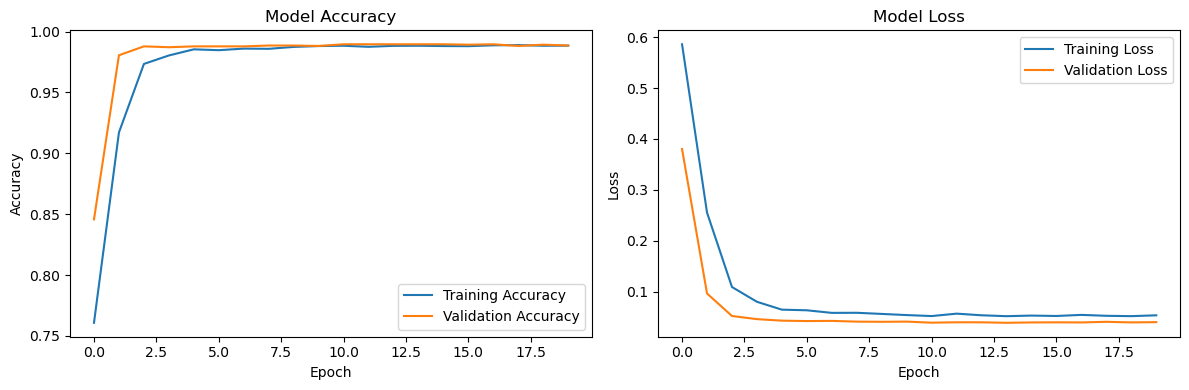

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Show plots
plt.tight_layout()
plt.show()



In [16]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,949 (136.52 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,300 (91.02 KB)

In [37]:
model.save('occupancy_detection.h5')

In [38]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('occupancy_detection.tflite', 'wb') as f:
    f.write(tflite_model)
print("TFLite model saved as occupancy_detection.tflite")


INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmp_8nsaib4\assets


INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmp_8nsaib4\assets


Saved artifact at 'C:\Users\Asus\AppData\Local\Temp\tmp_8nsaib4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_31')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2757198797264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757198794576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757198795536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757198796496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757198796688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757198798224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757198798608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757198802256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757198802064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2757198801680: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model sa

In [39]:
y_test

,Occupancy
10791,1.0
14854,0.0
5489,0.0
11982,1.0
11424,0.0
...,...
20126,0.0
13038,0.0
17935,1.0
9912,0.0


In [41]:
# (Optional) Load and test TFLite model
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test on one sample from the test set
interpreter.set_tensor(input_details[0]['index'], X_test[:1].astype(np.float32))
interpreter.invoke()
tflite_pred = interpreter.get_tensor(output_details[0]['index'])
print(f"Predicted Occupancy (TFLite): {tflite_pred[0][0]:.4f}")


Predicted Occupancy (TFLite): 0.9822


In [55]:
X_test[:5]

,Temperature,Humidity,Light,CO2,HumidityRatio
10791,0.942989,0.404878,0.461570,0.457190,0.565011
14854,0.203390,0.868161,0.011636,0.056048,0.695337
5489,0.314330,0.499011,0.126970,0.008264,0.412172
11982,0.838213,0.252765,0.426278,0.242675,0.357705
11424,0.295840,0.419908,0.000000,0.062359,0.333804


In [54]:
y_test[:5]

,Occupancy
10791,1.0
14854,0.0
5489,0.0
11982,1.0
11424,0.0


In [42]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'serving_default_keras_tensor_31:0', 'index': 0, 'shape': array([1, 5]), 'shape_signature': array([-1,  5]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall_1:0', 'index': 16, 'shape': array([1, 1]), 'shape_signature': array([-1,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [57]:
import numpy as np

# Assuming 'model' is your trained model
input_occupancy = np.array([0.902989, 0.424878, 0.461570, 0.457190, 0.565011]).reshape(1, -1)
input_no_occupancy = np.array([0.103390, 0.808161, 0.011636, 0.056048, 0.695337]).reshape(1, -1)

# Predict occupancy status
pred_occupancy = model.predict(input_occupancy)
print("Prediction for occupancy input (should predict 1):", pred_occupancy)

pred_no_occupancy = model.predict(input_no_occupancy)
print("Prediction for no occupancy input (should predict 0):", pred_no_occupancy)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction for occupancy input (should predict 1): [[0.98231924]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for no occupancy input (should predict 0): [[9.956691e-06]]


In [43]:
# Function to convert some hex values into an array for C programming
import time, sys

# Function to convert some hex values into an array for C programming
def hex_to_c_array(hex_data, var_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += "#define " + var_name.upper() + '_H\n\n'

    c_str += "/*\n Author: Lohith R Gowda \n"
    c_str += " CAUTION: This is an auto generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"

# Time stamping of this model data in the generated file
    localtime = time.asctime( time.localtime(time.time()) )
    c_str += " This model data was generated on " + localtime+ '\n\n'
    print("This model data was generated on:", localtime)

# Add information about the verisons of tools and packages used in generating this header file
    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" + str(np.version.version) + \
          "\n TensorFlow:" + str(sys.version) + "\n Keras: "+ str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.version.version, \
          "\n TensorFlow:", sys.version, "\n Keras: ", tf.keras.__version__, "\n\n")

# Training details of the model
    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS = ' + str(NUM_OF_EPOCHS) + '\n'
    c_str += ' BATCH_SIZE    = ' + str(BATCH_SIZE) + '\n*/\n'

# Generate 'C' constants for the no. of nodes in each layer
    c_str += '\nconst int ' + 'DENSE1_SIZE' + ' = ' + str(128) + ';\n'
    c_str +=   'const int ' + 'DENSE2_SIZE' + ' = ' + str(64) + ';\n'
    c_str +=   'const int ' + 'DENSE3_SIZE' + ' = ' + str(32) + ';\n'
    c_str +=   'const int ' + 'DROPOUT1_RATE' + ' = ' + str(0.2) + ';\n'
    c_str +=   'const int ' + 'DENSE4_SIZE' + ' = ' + str(64) + ';\n'
    c_str +=   'const int ' + 'DROPOUT2_RATE' + ' = ' + str(0.3) + ';\n'
    c_str +=   'const int ' + 'DENSE5_SIZE' + ' = ' + str(128) + ';\n'
    c_str +=   'const int ' + 'DENSE6_SIZE' + ' = ' + str(1) + ';\n'

    # Add array length at the top of the file
    c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'alignas(8) const unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data):
        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formating so each line stays within 80 characters
        if (i + 1) < len(hex_data):
          hex_str += ','
        if (i + 1) % 12 == 0:
          hex_str += '\n'
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n' + format(''.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [44]:
# Write TFLite model to a C source (or header) file
with open("occupancy_detection_esp32" + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, "occupancy_detection_esp32"))

This model data was generated on: Sun Nov 10 17:51:53 2024
Tools used: Python: 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)] 
 Numpy: 1.26.4 
 TensorFlow: 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)] 
 Keras:  3.5.0 




In [1]:
pip install tensorflow pydot graphviz


   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


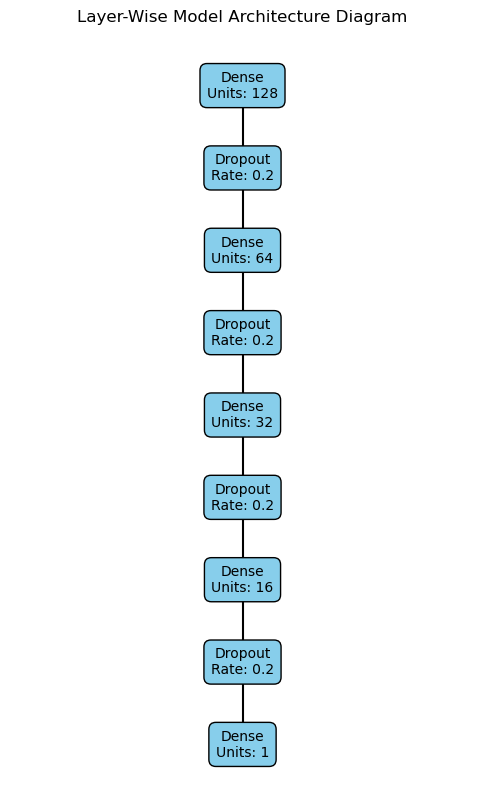

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Run a forward pass with dummy data to build the model
model(tf.random.uniform((1, 4)))

# Prepare the figure
plt.figure(figsize=(6, 10))
plt.axis('off')

# Layer names and positions
y_positions = list(range(len(model.layers) * 2, 0, -2))
x_position = 1

# Plot each layer as a box with connections
for i, layer in enumerate(model.layers):
    if isinstance(layer, tf.keras.layers.Dense):
        label = f"{layer.__class__.__name__}\nUnits: {layer.units}"
    elif isinstance(layer, tf.keras.layers.Dropout):
        label = f"{layer.__class__.__name__}\nRate: {layer.rate}"
    else:
        label = layer.__class__.__name__

    # Draw the box for the layer
    plt.text(x_position, y_positions[i], label, ha='center', va='center',
             bbox=dict(facecolor='skyblue', edgecolor='black', boxstyle='round,pad=0.5'))

    # Draw the connecting lines between layers
    if i > 0:
        plt.plot([x_position, x_position], [y_positions[i-1] + 0.5, y_positions[i] - 0.5], 'k-')

# Display the diagram
plt.title("Layer-Wise Model Architecture Diagram")
plt.show()


